In [0]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
drive  sample_data


In [0]:
!pwd
!ls

/content
drive  sample_data


In [0]:
%cd /content/drive/My Drive/ML/dataset


/content/drive/My Drive/ML/dataset


In [0]:
!ls

Automobile.csv


In [0]:
path = '/content/drive/My Drive/ML/dataset'

In [0]:
auto_data = path + '/Automobile.csv'

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier, RidgeClassifier

In [0]:
def Linear_SVC(X_train,y_train,X_test):
    clf = LinearSVC(random_state = 100,tol = 1e-5)
    scores = cross_val_score(clf, X_train, y_train, cv =10 )
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    return y_pred,scores

In [0]:
def SGD_Classifier(X_train,y_train,X_test):
    clf = SGDClassifier(max_iter=1000, random_state = 70,tol = 1e-3)
    scores = cross_val_score(clf, X_train, y_train, cv =10 )
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    return y_pred,scores

In [0]:
def Ridge_Classifier(X_train,y_train,X_test):
    clf = RidgeClassifier(max_iter=1000, random_state = 40,tol = 1e-3)
    scores = cross_val_score(clf, X_train, y_train, cv =10 )
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    return y_pred,scores

In [0]:
def printReport(y_test,y_predict):
    #finding the accuracy of results
    acc = accuracy_score(y_test, y_predict)
    print("Accuracy comes out to be: ",acc)
    #calculating precision and recall
    print(classification_report(y_test,y_predict))
    
    #creating confusion matrix
    print("Confusion Matrix for the Classification result:")
    print(pd.DataFrame(
            confusion_matrix(y_test, y_predict),
            columns =['Predicted Pedestrian Safe','Predicted Pedestrian Affected'],
            index=['True Pedestrian Safe','True Pedestrian Affected']))
    
    fpr, tpr , thresholds = roc_curve(y_test, y_predict, pos_label=1)
    plt.plot([0, 1],[0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='o')
    plt.show()
    return

In [0]:
    
def LinearModels(X_train,y_train,X_test,y_test):
  print("Result using Linear SVC Classification:\n")
  y_lsvc, scores_lsvc = Linear_SVC(X_train,y_train,X_test)
  printReport(y_test,y_lsvc)
    
  print("Result using Stochastic Gradient Descent Classification:\n")
  y_sgdc, scores_sgdc = SGD_Classifier(X_train,y_train,X_test)
  printReport(y_test,y_sgdc)
    
  print("Result using Ridge Classification:\n")
  y_rc, scores_rc = SGD_Classifier(X_train,y_train,X_test)
  printReport(y_test,y_rc)
  return

In [0]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier



In [0]:
def BaggingClassif(X_train,y_train,X_test):
    seed = 7
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    classif = DecisionTreeClassifier()
    num_trees = 50
    model = BaggingClassifier(base_estimator=classif, n_estimators=num_trees, random_state=seed)
    scores = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    return y_pred,scores

In [0]:
def RandomForest(X_train,y_train,X_test):
    seed = 7
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    num_trees = 50
    model = RandomForestClassifier(n_estimators=num_trees, random_state=seed)
    scores = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    return y_pred,scores


In [0]:
def ExtraTreeClassif(X_train,y_train,X_test):
    seed = 7
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    num_trees = 50
    model = ExtraTreesClassifier(n_estimators=num_trees, random_state=seed)
    scores = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    return y_pred,scores

In [0]:
def AdaBoost(X_train,y_train,X_test):
    seed = 7
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model = AdaBoostClassifier(n_estimators=100, random_state=seed)
    scores = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    return y_pred,scores

In [0]:
def GradientTreeBoost(X_train,y_train,X_test):
    seed = 7
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1,random_state=seed)
    scores = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    return y_pred,scores

In [0]:
def EnsembleModels(X_train,y_train,X_test, y_test):
    print("Result using Bagging Classification:\n")
    y_bag, scores_bag = BaggingClassif(X_train,y_train,X_test)
    printReport(y_test,y_bag)
    
    print("Result using Random Forest Classification:\n")
    y_rf, scores_rf = RandomForest(X_train,y_train,X_test)
    printReport(y_test,y_rf)
    
    print("Result using Extra Tree Classification:\n")
    y_et, scores_et = ExtraTreeClassif(X_train,y_train,X_test)
    printReport(y_test,y_et)
    
    print("Result using AdaBoost Classification:\n")
    y_ab, scores_ab = AdaBoost(X_train,y_train,X_test)
    printReport(y_test,y_ab)
    
    print("Result using Gradient Tree Boosting Classification:\n")
    y_gtb, scores_gtb = GradientTreeBoost(X_train,y_train,X_test)
    printReport(y_test,y_gtb)
    return

In [0]:
def kNeighbors(X_train,y_train,X_test,y_test):
    #trying to find best value for k
    k_range = range(5,30)
    scores ={}
    scores_list=[]
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        y_predict = knn.predict(X_test)
        scores[k] = accuracy_score(y_test, y_predict)
        scores_list.append(scores[k])
    
    #creating and fitting the model to training data based on selected k value
    knn = KNeighborsClassifier(n_neighbors = 8)
    scores_knn = cross_val_score(knn, X_train, y_train, cv =10 )
    knn.fit(X_train, y_train)
    #predicting the result based on trained model
    y_predict = knn.predict(X_test)
    
    return y_predict, scores_knn

In [0]:
def decisionTree(X_train,y_train,X_test):
    #creating and fitting the model to training data
    decision_tree = DecisionTreeClassifier(criterion="entropy")
    scores_dt = cross_val_score(decision_tree, X_train, y_train, cv =10 )
    decision_tree = decision_tree.fit(X_train, y_train)  
    #predicting the result based on trained model
    y_predict = decision_tree.predict(X_test)

    return y_predict, scores_dt

In [0]:
def dummyClass(X_train, y_train, X_test):
    dc = DummyClassifier(strategy="stratified")
    scores_dc = cross_val_score(dc, X_train, y_train, cv =10)
    dc.fit(X_train, y_train )
    y_predict = dc.predict(X_test)
    
    return y_predict, scores_dc

In [0]:
def feature_selection(X,y):
    #---------- SelectKBest -----------#
    features = SelectKBest(score_func=f_classif, k=10)
    fit = features.fit(X,y)
    feat_scores = pd.DataFrame(fit.scores_)
    feat_cols = pd.DataFrame(X.columns)
    bestFeatures = pd.concat([feat_cols,feat_scores], axis = 1)
    bestFeatures.columns = ['Features','Score']
    best = bestFeatures.nlargest(20, 'Score' )
    print(bestFeatures.nlargest(20, 'Score' ))
    
    
    #---------- ExtraTreesClassifier -----------#
    etcmodel=ExtraTreesClassifier()
    etcmodel.fit(X,y)
    #print(etcmodel.feature_importances_)
    feat_imp = pd.Series(etcmodel.feature_importances_,index = X.columns)
    feat_imp.nlargest(20).plot(kind='barh')
    plt.show()
    
    return best

In [0]:
def main():
    
    filepath = auto_data
    
    df = pd.read_csv(filepath)
    
#    Data pre-processing
    df.drop(['X','Y','Index_','ACCNUM','DATE','STREET1','STREET2','OFFSET','LATITUDE','LONGITUDE', 
             'ACCLOC','YEAR','TIME','INVAGE','IMPACTYPE','INVTYPE','INITDIR','DRIVACT','DRIVCOND','CYCLISTYPE','PEDCOND','PEDACT',
             'PEDTYPE','CYCACT','CYCCOND','TRSN_CITY_','EMERG_VEH','Hood_ID','ObjectId','Division'],axis=1,inplace=True)
    df.dropna(axis = 1, inplace=True)
    df.replace(['Yes',' '],[1,0],inplace=True)
    
    y = df['PEDESTRIAN']
    df.drop('PEDESTRIAN',axis=1,inplace=True)
    #encoding labels to numbers
    X = pd.get_dummies(df)
    
#    Feature selection
    feat = feature_selection(X,y)
    
    print(feat['Features'].values)
    
    X_f = X
    for f in X.columns:
        if f not in feat['Features'].values:
#            print(f)
            X_f = X_f.drop(f,axis=1)
            
#   Remove this feature as it is overpowering feature for dataset.
#    X_f.drop('IMPACTYPE_Pedestrian Collisions',axis=1,inplace=True)
#    X_f has new features for training
    X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size =0.20, random_state=89 )

    print("Result using Decision Tree Classification:\n")
    y_decision, scores_dt = decisionTree(X_train,y_train,X_test)
    printReport(y_test,y_decision)
    
    print("Result using KNN Classification:\n")
    y_knn, scores_knn = kNeighbors(X_train,y_train,X_test,y_test)
    printReport(y_test,y_knn)
    
    print("Result using Rule based Classification:\n")
    y_dc, scores_dc = dummyClass(X_train,y_train,X_test)
    printReport(y_test,y_dc)

    LinearModels(X_train,y_train,X_test, y_test)
    EnsembleModels(X_train,y_train,X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


                  Features        Score
7                PASSENGER  1473.829651
3                  CYCLIST   868.365043
5               MOTORCYCLE   568.975020
101            MANOEUVER_0   526.399625
8                 SPEEDING   512.065832
78         VEHTYPE_Bicycle   315.083373
104  MANOEUVER_Going Ahead   309.235412
74            INJURY_Minor   295.080562
9                  AG_DRIV   261.778502
75             INJURY_None   261.416121
76               VEHTYPE_0   220.755483
85      VEHTYPE_Motorcycle   205.768973
73          INJURY_Minimal   199.256886
114      MANOEUVER_Stopped   177.480312
10                REDLIGHT   176.336469
1               INVAGE_AVG   172.807071
87           VEHTYPE_Other   159.076693
6                    TRUCK   145.989262
48         VISIBILITY_Rain   130.537893
12              DISABILITY   122.691295


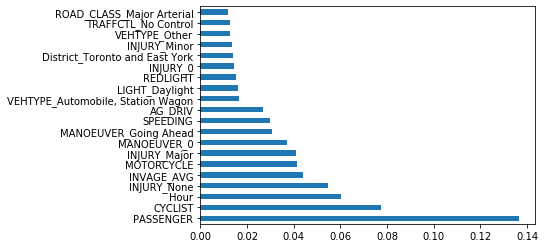

['PASSENGER' 'CYCLIST' 'MOTORCYCLE' 'MANOEUVER_0' 'SPEEDING'
 'VEHTYPE_Bicycle' 'MANOEUVER_Going Ahead' 'INJURY_Minor' 'AG_DRIV'
 'INJURY_None' 'VEHTYPE_0' 'VEHTYPE_Motorcycle' 'INJURY_Minimal'
 'MANOEUVER_Stopped' 'REDLIGHT' 'INVAGE_AVG' 'VEHTYPE_Other' 'TRUCK'
 'VISIBILITY_Rain' 'DISABILITY']
Result using Decision Tree Classification:

Accuracy comes out to be:  0.8688376300316599
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1352
           1       0.83      0.84      0.83       859

    accuracy                           0.87      2211
   macro avg       0.86      0.86      0.86      2211
weighted avg       0.87      0.87      0.87      2211

Confusion Matrix for the Classification result:
                          Predicted Pedestrian Safe  Predicted Pedestrian Affected
True Pedestrian Safe                           1202                            150
True Pedestrian Affected                        140                      

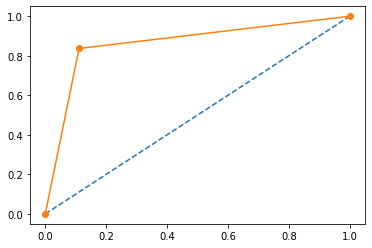

Result using KNN Classification:

Accuracy comes out to be:  0.8552691090004523
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1352
           1       0.82      0.81      0.81       859

    accuracy                           0.86      2211
   macro avg       0.85      0.85      0.85      2211
weighted avg       0.86      0.86      0.86      2211

Confusion Matrix for the Classification result:
                          Predicted Pedestrian Safe  Predicted Pedestrian Affected
True Pedestrian Safe                           1195                            157
True Pedestrian Affected                        163                            696


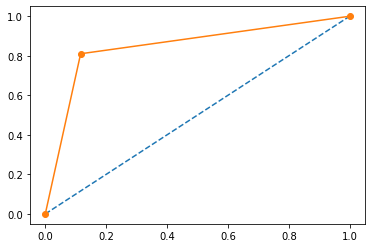

Result using Rule based Classification:

Accuracy comes out to be:  0.5137946630483944
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      1352
           1       0.38      0.38      0.38       859

    accuracy                           0.51      2211
   macro avg       0.49      0.49      0.49      2211
weighted avg       0.52      0.51      0.51      2211

Confusion Matrix for the Classification result:
                          Predicted Pedestrian Safe  Predicted Pedestrian Affected
True Pedestrian Safe                            808                            544
True Pedestrian Affected                        531                            328


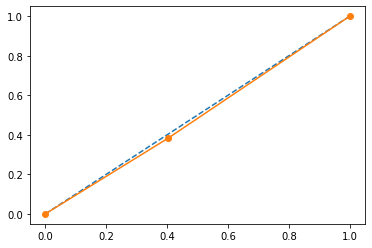

Result using Linear SVC Classification:



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy comes out to be:  0.8625056535504296
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1352
           1       0.83      0.82      0.82       859

    accuracy                           0.86      2211
   macro avg       0.86      0.85      0.86      2211
weighted avg       0.86      0.86      0.86      2211

Confusion Matrix for the Classification result:
                          Predicted Pedestrian Safe  Predicted Pedestrian Affected
True Pedestrian Safe                           1204                            148
True Pedestrian Affected                        156                            703


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


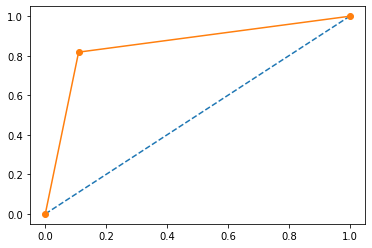

Result using Stochastic Gradient Descent Classification:

Accuracy comes out to be:  0.8661239258254184
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1352
           1       0.82      0.83      0.83       859

    accuracy                           0.87      2211
   macro avg       0.86      0.86      0.86      2211
weighted avg       0.87      0.87      0.87      2211

Confusion Matrix for the Classification result:
                          Predicted Pedestrian Safe  Predicted Pedestrian Affected
True Pedestrian Safe                           1200                            152
True Pedestrian Affected                        144                            715


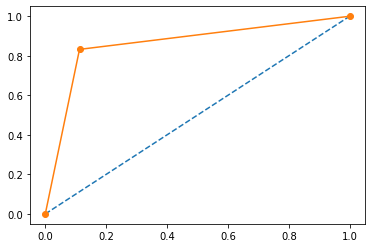

Result using Ridge Classification:

Accuracy comes out to be:  0.8661239258254184
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1352
           1       0.82      0.83      0.83       859

    accuracy                           0.87      2211
   macro avg       0.86      0.86      0.86      2211
weighted avg       0.87      0.87      0.87      2211

Confusion Matrix for the Classification result:
                          Predicted Pedestrian Safe  Predicted Pedestrian Affected
True Pedestrian Safe                           1200                            152
True Pedestrian Affected                        144                            715


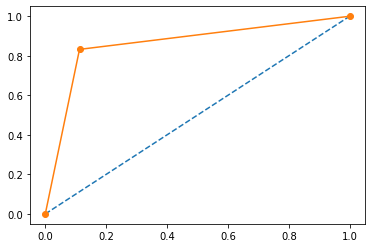

Result using Bagging Classification:

Accuracy comes out to be:  0.8701944821347807
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1352
           1       0.83      0.84      0.83       859

    accuracy                           0.87      2211
   macro avg       0.86      0.86      0.86      2211
weighted avg       0.87      0.87      0.87      2211

Confusion Matrix for the Classification result:
                          Predicted Pedestrian Safe  Predicted Pedestrian Affected
True Pedestrian Safe                           1201                            151
True Pedestrian Affected                        136                            723


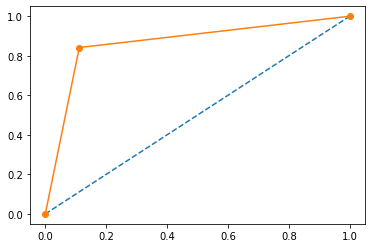

Result using Random Forest Classification:

Accuracy comes out to be:  0.8729081863410222
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1352
           1       0.83      0.84      0.84       859

    accuracy                           0.87      2211
   macro avg       0.87      0.87      0.87      2211
weighted avg       0.87      0.87      0.87      2211

Confusion Matrix for the Classification result:
                          Predicted Pedestrian Safe  Predicted Pedestrian Affected
True Pedestrian Safe                           1209                            143
True Pedestrian Affected                        138                            721


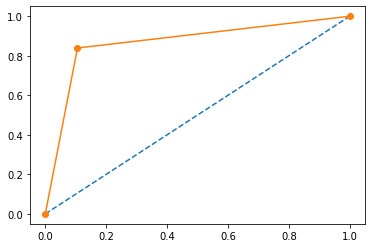

Result using Extra Tree Classification:

Accuracy comes out to be:  0.8710990502035278
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1352
           1       0.83      0.83      0.83       859

    accuracy                           0.87      2211
   macro avg       0.86      0.86      0.86      2211
weighted avg       0.87      0.87      0.87      2211

Confusion Matrix for the Classification result:
                          Predicted Pedestrian Safe  Predicted Pedestrian Affected
True Pedestrian Safe                           1210                            142
True Pedestrian Affected                        143                            716


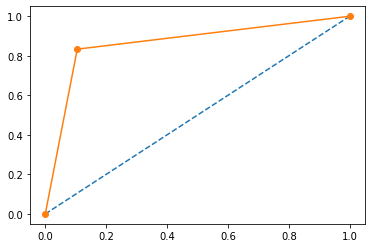

Result using AdaBoost Classification:

Accuracy comes out to be:  0.866576209859792
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1352
           1       0.81      0.85      0.83       859

    accuracy                           0.87      2211
   macro avg       0.86      0.86      0.86      2211
weighted avg       0.87      0.87      0.87      2211

Confusion Matrix for the Classification result:
                          Predicted Pedestrian Safe  Predicted Pedestrian Affected
True Pedestrian Safe                           1186                            166
True Pedestrian Affected                        129                            730


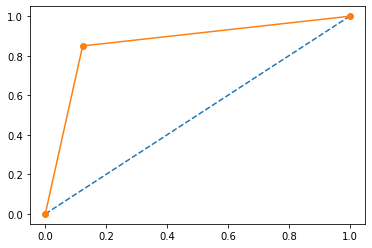

Result using Gradient Tree Boosting Classification:

Accuracy comes out to be:  0.8715513342379014
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1352
           1       0.83      0.83      0.83       859

    accuracy                           0.87      2211
   macro avg       0.86      0.86      0.86      2211
weighted avg       0.87      0.87      0.87      2211

Confusion Matrix for the Classification result:
                          Predicted Pedestrian Safe  Predicted Pedestrian Affected
True Pedestrian Safe                           1210                            142
True Pedestrian Affected                        142                            717


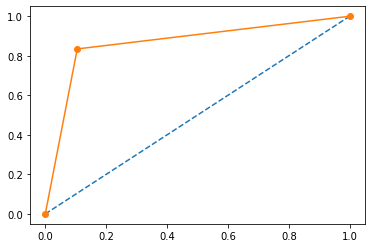

In [0]:

if __name__ =="__main__":
    main()